In [26]:
import pandas as pd 
import geopandas as gpd 
from shapely.geometry import Point, Polygon

gw_df = pd.read_csv("../../notebooks-and-markdowns/gw_final_df.csv")

In [27]:
gw_df = gw_df[gw_df['SoilMoi0_10cm_inst'].notnull()]

In [28]:
gw_df
df_subset = gw_df[gw_df['time']=='2023-03-01']
df_subset

,Unnamed: 0,time,lon,lat,lwe_thickness,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,d_SWE_inst,d_SoilMoi0_10cm_inst,gw_estimate
503144,503144,2023-03-01,-104.875,41.125,-1.903475,0.957661,16.742096,75.926670,39.121820,170.80942,-2.019673,-1.053337,0.213587
503145,503145,2023-03-01,-104.875,41.125,-1.903475,0.957661,16.742096,75.926670,39.121820,170.80942,-2.019673,-1.053337,0.213587
503146,503146,2023-03-01,-104.875,41.375,-1.903475,0.911855,16.597948,68.842740,33.696503,166.66685,-2.065480,-1.197485,0.222748
503147,503147,2023-03-01,-104.875,41.375,-1.903475,0.911855,16.597948,68.842740,33.696503,166.66685,-2.065480,-1.197485,0.222748
503148,503148,2023-03-01,-104.625,41.125,-1.903475,0.857581,17.045261,85.004420,55.947420,170.75407,-2.119754,-0.750172,0.233603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505447,505447,2023-03-01,-109.375,42.375,-5.858991,116.150970,23.248468,53.135635,48.290390,174.91302,113.173640,5.453035,-23.220627
505448,505448,2023-03-01,-109.125,42.125,-5.858991,112.066980,21.882370,61.174572,68.428390,177.41586,109.089645,4.086937,-22.403828
505449,505449,2023-03-01,-109.125,42.125,-5.858991,112.066980,21.882370,61.174572,68.428390,177.41586,109.089645,4.086937,-22.403828
505450,505450,2023-03-01,-109.125,42.375,-5.858991,119.137825,24.498734,46.743546,46.002388,171.12305,116.160490,6.703301,-23.817997


In [29]:
#df_subset.plot(x=df_subset.lon, y=df_subset.lat)
geometry = [Point(xy) for xy in zip(df_subset['lon'], df_subset['lat'])]
geometry[:3]

geo_df = gpd.GeoDataFrame(df_subset, #specify our data
                          crs='epsg:4326', #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

,Unnamed: 0,time,lon,lat,lwe_thickness,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,d_SWE_inst,d_SoilMoi0_10cm_inst,gw_estimate,geometry
503144,503144,2023-03-01,-104.875,41.125,-1.903475,0.957661,16.742096,75.92667,39.121820,170.80942,-2.019673,-1.053337,0.213587,POINT (-104.87500 41.12500)
503145,503145,2023-03-01,-104.875,41.125,-1.903475,0.957661,16.742096,75.92667,39.121820,170.80942,-2.019673,-1.053337,0.213587,POINT (-104.87500 41.12500)
503146,503146,2023-03-01,-104.875,41.375,-1.903475,0.911855,16.597948,68.84274,33.696503,166.66685,-2.065480,-1.197485,0.222748,POINT (-104.87500 41.37500)
503147,503147,2023-03-01,-104.875,41.375,-1.903475,0.911855,16.597948,68.84274,33.696503,166.66685,-2.065480,-1.197485,0.222748,POINT (-104.87500 41.37500)
503148,503148,2023-03-01,-104.625,41.125,-1.903475,0.857581,17.045261,85.00442,55.947420,170.75407,-2.119754,-0.750172,0.233603,POINT (-104.62500 41.12500)


KeyError: <Axes: title={'center': 'Colorado River Basin'}>

<Figure size 1000x1000 with 0 Axes>

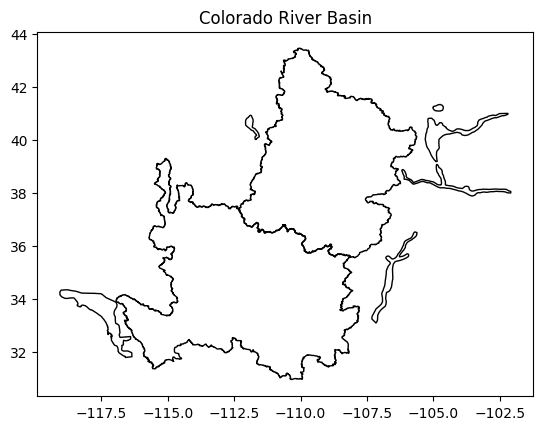

In [30]:
import matplotlib.pyplot as plt

shpfl = gpd.read_file("/home/kmk58/remoteData/shapefiles/Colorado_River_Basin_Hydrological_Boundaries_with_Areas_served_by_Colorado_River.shp")

# plot of entire Colorado River Basin
plt.style.use('default')
plt.figure(figsize=[10,10])
base = shpfl.plot(facecolor='none', edgecolor='black')
plt.title("Colorado River Basin")
plt.grid(which="minor")
#plt.minorticks_on()
#plt.show()

#df_subset.plot(x=base, marker='o', color='red', markersize=1)

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x7f67d50a22a0> (for post_execute):


KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

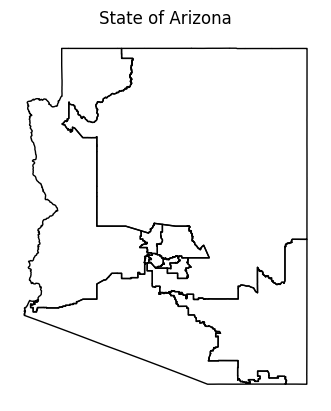

In [33]:
shpfl = gpd.read_file("/home/kmk58/data/tl_rd22_04_cd118.shp")

# plot of entire Colorado River Basin
plt.style.use('default')
plt.figure(figsize=[10,10])
base = shpfl.plot(facecolor='none', edgecolor='black').set_axis_off()
plt.title("State of Arizona")
#plt.grid(which="minor")
#plt.minorticks_on()
#plt.show()
base

df_subset = gw_df[gw_df['time']=='2023-03-01']

gw_df.plot(x=base, marker='o', color='red', markersize=1)